# Descriptive and exploratory analysis of global COVID-19 outbreak

## 1. Data manipulation and cleansing

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
#import geopandas as gpd
#from geopandas import GeoDataFrame
# from shapely.geometry import Point

### 1.1 Load the data

In [2]:
file_confirmed = './time_series_covid19_confirmed_global.csv'
file_recovered = './time_series_covid19_recovered_global.csv'
file_deaths = './time_series_covid19_deaths_global.csv'
file_country_code = './country_codes.csv'
file_population = './population-figures-by-country-csv_csv.csv'

df_confirmed = pd.read_csv(file_confirmed)
df_recovered = pd.read_csv(file_recovered)
df_deaths = pd.read_csv(file_deaths)
df_population = pd.read_csv(file_population)
df_country_code = pd.read_csv(file_country_code)

In [3]:
# look at our file structure (confirmed cases)
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,714,784,840,906,933,996,1026,1092,1176,1279
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,475,494,518,539,548,562,584,609,634,663
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,659,673,673,696,704,713,717,717,723,723
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,24,24,24,24,25,25


In [4]:
# look at our file structure (recovered cases)
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,40,43,54,99,112,131,135,150,166,179
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,248,251,277,283,302,314,327,345,356,385
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,691,708,783,846,894,1047,1099,1152,1204,1355
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,128,169,169,191,205,235,248,282,309,333
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,5,5,5,5,6,6,6,6,6,6


In [5]:
# look at our file structure (death cases)
df_deaths.head() 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,23,25,30,30,30,33,36,36,40,42
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,24,25,26,26,26,26,26,26,27,27
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,326,336,348,364,367,375,384,392,402,407
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,31,33,33,35,35,36,37,37,37,37
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [6]:
# look at our file structure (population)
df_population.head()

,Country,Country_Code,Year_1960,Year_1961,Year_1962,Year_1963,Year_1964,Year_1965,Year_1966,Year_1967,...,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822
1,Afghanistan,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032
2,Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281


In [7]:
# look at our file structure (country code)
df_country_code.head()

,Country,Country_Code
0,occupied Palestinian territory,PSE
1,Saint Martin,ANT
2,Holy See,VAT
3,Saint Barthelemy,BLM
4,Vatican City,VAT


### 1.2 Cleanse the data

### Approach
According to Perrin(2020), data cleaning includes following steps: filling missing values, smoothing noise, removing outliers and resolving inconsisitencies.

Therefore, for each file (confirmed, recovered, deaths), following steps are performed. 
1. Identify null values
    
2. Resolve inconsistencies
    There are COVID-19 cases related to ships. 
    However, there is an inconsistency about how the data related to ships is treated. 
    In some cases, they are treated like coutries, but in other cases, they are treated as states or provinces. 
    Those cases related to ships are deleted from the dataframe as this analysis focuses on coutry only.
       
3. Identify outliers
    1. Regarding confirmed cases, delete the rows if there is zero cases for the entire duration
    2. Identify negative values in reported cases and make corrections accordingly.  
        
4. Merge country code file
    It is noticed that some territories of countries have their own country code such as Greenland in Denmark.
    These territories are treated as province/state in each file.
    Therefore, our approach is that firstly, merge the country code file using country/region name as the key.
    Secondly, merge the country code file using province/state name as the key.
    If country code column using province/state name is null, replace the value with the country codes found in the first step. 
    Lastly, if there are missing values in country codes, fill in them manually with reference to  <a href= "https://www.iban.com/country-codes">IBAN.com (n.d.)</a>.
        
5. Merge population
    1. Estimate population in 2020 using linear regression.
        The provided population file only contains yearly population from 1960 to 2016. 
        In order to estimate population for 2020, linear regression method is used.
        According to Pardoe (2012), linear regression can be used when there is a linear association between two variables.
        It is assumed that population has a linear growth over time, threfore, this method is used to estimate popluation in 2020
        with the x-axis as number of years (starting from 1960) and y-axis as population.
    2. Merge population using Country Code as the key
    3. Fill in missing population
        The missing population is filled in manually with reference to <a href= "https://www.worldometers.info/world-population/population-by-country/">Worldometer. (n.d.).</a>

### Findings

1. Identify null values
    There are no null values for three files, but the recovered file only has 250 rows file while other files have 264 rows.
    The difference is that Canada only reported recovered cases by country while in other files, the numbers are reported by states.
    
2. Resolve inconsistencies
    There are COVID-19 cases related to ships. 
    However, there is an inconsistency about how the data related to ships is treated. 
    In some cases, they are treated like coutries, but in other cases, they are treated as states or provinces. 

3. Identify outliers
    1. In the confirmed case file, there is a row with zero cases reported and it is deleted from the dataframe.

    2. Regarding negative values, recovered case file contains cases with negative values which is impossible to occur as they represent accumulated numbers.
        Those values are replaced with the numbers reported before.

4. Merge country code file
    For each file, it is found out that there are some missing values in Country Code after country code file is merged, such as Saint Kitts and Nevis and Western Sahara.
    Those missing values are filled in manually.

5. Merge population
    It is found out that there are some missing values in Population after population file is merged, such as Holy See and Western Sahara.
    Those missing values are filled in manually.

### 1. Identify null values

In [8]:
#Check if there are null values foe confirmed cases
df_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 97 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  82 non-null     object 
 1   Country/Region  264 non-null    object 
 2   Lat             264 non-null    float64
 3   Long            264 non-null    float64
 4   1/22/20         264 non-null    int64  
 5   1/23/20         264 non-null    int64  
 6   1/24/20         264 non-null    int64  
 7   1/25/20         264 non-null    int64  
 8   1/26/20         264 non-null    int64  
 9   1/27/20         264 non-null    int64  
 10  1/28/20         264 non-null    int64  
 11  1/29/20         264 non-null    int64  
 12  1/30/20         264 non-null    int64  
 13  1/31/20         264 non-null    int64  
 14  2/1/20          264 non-null    int64  
 15  2/2/20          264 non-null    int64  
 16  2/3/20          264 non-null    int64  
 17  2/4/20          264 non-null    int

In [9]:
#Check if there are null values foe recovered cases
df_recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 97 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  67 non-null     object 
 1   Country/Region  250 non-null    object 
 2   Lat             250 non-null    float64
 3   Long            250 non-null    float64
 4   1/22/20         250 non-null    int64  
 5   1/23/20         250 non-null    int64  
 6   1/24/20         250 non-null    int64  
 7   1/25/20         250 non-null    int64  
 8   1/26/20         250 non-null    int64  
 9   1/27/20         250 non-null    int64  
 10  1/28/20         250 non-null    int64  
 11  1/29/20         250 non-null    int64  
 12  1/30/20         250 non-null    int64  
 13  1/31/20         250 non-null    int64  
 14  2/1/20          250 non-null    int64  
 15  2/2/20          250 non-null    int64  
 16  2/3/20          250 non-null    int64  
 17  2/4/20          250 non-null    int

In [10]:
#Check if there are null values foe deaths
df_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 97 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  82 non-null     object 
 1   Country/Region  264 non-null    object 
 2   Lat             264 non-null    float64
 3   Long            264 non-null    float64
 4   1/22/20         264 non-null    int64  
 5   1/23/20         264 non-null    int64  
 6   1/24/20         264 non-null    int64  
 7   1/25/20         264 non-null    int64  
 8   1/26/20         264 non-null    int64  
 9   1/27/20         264 non-null    int64  
 10  1/28/20         264 non-null    int64  
 11  1/29/20         264 non-null    int64  
 12  1/30/20         264 non-null    int64  
 13  1/31/20         264 non-null    int64  
 14  2/1/20          264 non-null    int64  
 15  2/2/20          264 non-null    int64  
 16  2/3/20          264 non-null    int64  
 17  2/4/20          264 non-null    int

In [11]:
#The reason why recovered file has less number of rows is because the data for Canada is reported only as the contry 

#Display Canada's confirmed cases
df_confirmed[df_confirmed['Country/Region']=='Canada']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
35,Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,0,...,1870,1870,1996,2397,2562,2803,2908,3095,3401,3720
36,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,1490,1517,1561,1575,1618,1647,1647,1724,1795,1824
37,Grand Princess,Canada,37.6489,-122.6655,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,-1,-1
38,Manitoba,Canada,53.7609,-98.8139,0,0,0,0,0,0,...,246,246,250,250,253,254,254,255,257,262
39,New Brunswick,Canada,46.5653,-66.4619,0,0,0,0,0,0,...,116,117,117,117,117,118,118,118,118,118
40,Newfoundland and Labrador,Canada,53.1355,-57.6604,0,0,0,0,0,0,...,244,247,252,256,257,257,257,257,256,256
41,Nova Scotia,Canada,44.6820,-63.7443,0,0,0,0,0,0,...,517,549,579,606,649,675,721,737,772,827
42,Ontario,Canada,51.2538,-85.3232,0,0,0,0,1,1,...,7953,8447,9840,10456,11013,11561,12063,12715,13718,14068
43,Prince Edward Island,Canada,46.5107,-63.4168,0,0,0,0,0,0,...,25,26,26,26,26,26,26,26,26,26
44,Quebec,Canada,52.9399,-73.5491,0,0,0,0,0,0,...,14248,14860,15857,16798,17521,17950,19319,20126,20965,21838


In [12]:
#Display Canada's recovered cases
df_recovered[df_recovered['Country/Region']=='Canada']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
36,NaN,Canada,56.1304,-106.3468,0,0,0,0,0,0,...,8210,8966,9698,10545,10964,11847,12543,13188,14454,14761


### 2. Resolve inconsistencies

#### Confirmed cases

In [13]:
df_confirmed[(df_confirmed['Country/Region'] == 'Canada') & ((df_confirmed['Province/State'] == 'Grand Princess') | (df_confirmed['Province/State'] == 'Diamond Princess'))] 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
37,Grand Princess,Canada,37.6489,-122.6655,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,-1,-1
231,Diamond Princess,Canada,0.0000,0.0000,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0


In [14]:
df_confirmed[(df_confirmed['Country/Region'] == 'Diamond Princess') | (df_confirmed['Country/Region'] == 'MS Zaandam') ] 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
88,NaN,Diamond Princess,0.0,0.0,0,0,0,0,0,0,...,712,712,712,712,712,712,712,712,712,712
252,NaN,MS Zaandam,0.0,0.0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9


In [15]:
#delete the above rows
df_confirmed = df_confirmed.drop(37)
df_confirmed = df_confirmed.drop(231)
df_confirmed = df_confirmed.drop(88)
df_confirmed = df_confirmed.drop(252)

In [16]:
#check the result
df_confirmed[(df_confirmed['Country/Region'] == 'Canada') & ((df_confirmed['Province/State'] == 'Grand Princess') | (df_confirmed['Province/State'] == 'Diamond Princess'))] 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20


In [17]:
#check the result
df_confirmed[(df_confirmed['Country/Region'] == 'Canada') & ((df_confirmed['Province/State'] == 'Grand Princess') | (df_confirmed['Province/State'] == 'Diamond Princess'))] 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20


In [18]:
#### Recovered cases

In [19]:
df_recovered[(df_recovered['Country/Region'] == 'Diamond Princess') | (df_recovered['Country/Region'] == 'MS Zaandam') ] 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
79,NaN,Diamond Princess,0.0,0.0,0,0,0,0,0,0,...,639,639,644,644,644,644,644,644,644,645
238,NaN,MS Zaandam,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#delete the above rows
df_recovered = df_recovered.drop(79)
df_recovered = df_recovered.drop(238)

In [21]:
#check the result
df_recovered[(df_recovered['Country/Region'] == 'Diamond Princess') | (df_recovered['Country/Region'] == 'MS Zaandam') ] 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20


#### Deaths

In [22]:
df_deaths[(df_deaths['Country/Region'] == 'Canada') & ((df_deaths['Province/State'] == 'Grand Princess') | (df_deaths['Province/State'] == 'Diamond Princess'))] 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
37,Grand Princess,Canada,37.6489,-122.6655,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1,-1
231,Diamond Princess,Canada,0.0000,0.0000,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1


In [23]:
df_deaths[(df_deaths['Country/Region'] == 'Diamond Princess') | (df_deaths['Country/Region'] == 'MS Zaandam') ] 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
88,NaN,Diamond Princess,0.0,0.0,0,0,0,0,0,0,...,12,12,12,13,13,13,13,13,13,13
252,NaN,MS Zaandam,0.0,0.0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [24]:
#delete the above rows
df_deaths = df_deaths.drop(37)
df_deaths = df_deaths.drop(231)
df_deaths = df_deaths.drop(88)
df_deaths = df_deaths.drop(252)

In [25]:
#check the result
df_deaths[(df_deaths['Country/Region'] == 'Canada') & ((df_deaths['Province/State'] == 'Grand Princess') | (df_deaths['Province/State'] == 'Diamond Princess'))] 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20


In [26]:
#check the result
df_deaths[(df_deaths['Country/Region'] == 'Diamond Princess') | (df_deaths['Country/Region'] == 'MS Zaandam') ] 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20


### 3. Identify outliers

#### 1. Regarding confirmed cases, delete the rows if there is zero cases for the entire duration

In [27]:
#Identily rows with only zero confirmed cases
df_confirmed[(df_confirmed.iloc[:,5:97] ==0).all(1)]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
238,Recovered,Canada,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#delete the above row from the dataframe
df_confirmed = df_confirmed.drop(238)

#confirm that the row is deleted
df_confirmed[df_confirmed['Province/State']=='Recovered']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20


#### 2. Identify negative values in reported cases and make corrections accordingly.  

#### Recovered cases

In [29]:
#identify the rows with negative values
df_recovered[['Country/Region','Province/State', '4/13/20','4/14/20','4/15/20','4/16/20','4/17/20','4/18/20','4/19/20','4/20/20','4/21/20','4/22/20','4/23/20']][(df_recovered['Country/Region'] == 'United Kingdom')&(df_recovered['Province/State'].isnull())]

,Country/Region,Province/State,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
223,United Kingdom,NaN,0,0,0,0,0,0,0,0,0,0,0


In [30]:
# fill in falsy records that reported 0 
df_recovered.loc[223,['4/13/20','4/14/20','4/15/20','4/16/20','4/17/20','4/18/20','4/19/20','4/20/20','4/21/20','4/22/20','4/23/20']] = [344,344,344,344,344,344,344,344,344,344,344]
#display the result
df_recovered[(df_recovered['Country/Region'] == 'United Kingdom')&(df_recovered['Province/State'].isnull())]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
223,NaN,United Kingdom,55.3781,-3.436,0,0,0,0,0,0,...,344,344,344,344,344,344,344,344,344,344


In [31]:
#identify the rows with negative values
df_recovered[(df_recovered['Country/Region'] == 'Netherlands')&(df_recovered['Province/State'].isnull())]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
166,NaN,Netherlands,52.1326,5.2913,0,0,0,0,0,0,...,250,250,250,250,250,250,250,0,0,0


In [32]:
# fill in falsy records that reported 0 
df_recovered.loc[166,['4/21/20','4/22/20','4/23/20']] = [250,250,250]
#display the result
df_recovered[(df_recovered['Country/Region'] == 'Netherlands')&(df_recovered['Province/State'].isnull())]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
166,NaN,Netherlands,52.1326,5.2913,0,0,0,0,0,0,...,250,250,250,250,250,250,250,250,250,250


### 3. Merge country code

#### Findings
For each file, it is found out that there are some missing values in Country Code after country code file is merged, such as Saint Kitts and Nevis and Western Sahara.
Those missing values are filled in manually with reference from IBAN.com (2020).

#### Confirmed cases

In [33]:
#merge with the country code  file using Country/Region	 as the key
df_confirmed = pd.merge(df_confirmed, df_country_code, left_on='Country/Region', right_on = 'Country', how='left')

#delete duplicated column
df_confirmed = df_confirmed.drop(['Country'], axis=1)

df_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,Country_Code
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,784,840,906,933,996,1026,1092,1176,1279,AFG
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,494,518,539,548,562,584,609,634,663,ALB
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,2160,2268,2418,2534,2629,2718,2811,2910,3007,DZA
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,673,673,696,704,713,717,717,723,723,AND
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,19,19,19,24,24,24,24,25,25,AGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,FRA
257,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,5,SSD
258,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,NaN
259,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,STP


In [34]:
#merge with the country code file using Province/State as the key
df_confirmed = pd.merge(df_confirmed, df_country_code, left_on='Province/State', right_on = 'Country', how='left')

#delete duplicated column
df_confirmed = df_confirmed.drop(['Country'], axis=1)

df_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,Country_Code_x,Country_Code_y
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,840,906,933,996,1026,1092,1176,1279,AFG,NaN
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,518,539,548,562,584,609,634,663,ALB,NaN
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,2268,2418,2534,2629,2718,2811,2910,3007,DZA,NaN
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,673,696,704,713,717,717,723,723,AND,NaN
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,19,19,24,24,24,24,25,25,AGO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,FRA,NaN
259,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,4,4,4,4,4,4,4,5,SSD,NaN
260,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,NaN,NaN
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,STP,NaN


In [35]:
#if Country_Code_y (matched with Province/State) is null, replace the value with Country_Code_x (matched with Country/Region)
#This is performed as some Province/State have their own country code
df_confirmed['Country_Code_y'] = df_confirmed['Country_Code_y'].fillna(df_confirmed['Country_Code_x'])

#rename the column Country_Code_y to Country_Code
df_confirmed = df_confirmed.rename(columns={'Country_Code_y': 'Country_Code'})

#delete unnecessary column
df_confirmed = df_confirmed.drop(['Country_Code_x'], axis = 1)

df_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,Country_Code
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,784,840,906,933,996,1026,1092,1176,1279,AFG
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,494,518,539,548,562,584,609,634,663,ALB
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,2160,2268,2418,2534,2629,2718,2811,2910,3007,DZA
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,673,673,696,704,713,717,717,723,723,AND
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,19,19,19,24,24,24,24,25,25,AGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,FRA
259,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,5,SSD
260,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,NaN
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,STP


In [36]:
#identify rows with null Country_Code
df_confirmed[df_confirmed['Country_Code'].isnull()]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,Country_Code
244,NaN,Saint Kitts and Nevis,17.357822,-62.782998,0,0,0,0,0,0,...,14,14,14,14,14,15,15,15,15,NaN
248,NaN,Burma,21.916200,95.956000,0,0,0,0,0,0,...,74,85,88,98,111,119,121,123,139,NaN
260,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,NaN
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,NaN


In [37]:
#fill in above values manually
df_confirmed.loc[df_confirmed['Country/Region']=='Saint Kitts and Nevis',['Country_Code']] = 'KNA' 
df_confirmed.loc[df_confirmed['Country/Region']=='Western Sahara',['Country_Code']] = 'ESH' 
df_confirmed.loc[df_confirmed['Country/Region']=='Yemen',['Country_Code']] = 'YEM' 
df_confirmed.loc[df_confirmed['Country/Region']=='Burma',['Country_Code']] = 'MMR' 

In [38]:
#confirm the result
df_confirmed[df_confirmed['Country_Code'].isnull()]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,Country_Code


#### Recovered cases

In [39]:
#perform the exact same steps as confirmed cases
df_recovered = pd.merge(df_recovered, df_country_code, left_on='Country/Region', right_on = 'Country', how='left')
df_recovered = df_recovered.drop(['Country'], axis=1)
df_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,Country_Code
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,43,54,99,112,131,135,150,166,179,AFG
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,251,277,283,302,314,327,345,356,385,ALB
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,708,783,846,894,1047,1099,1152,1204,1355,DZA
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,169,169,191,205,235,248,282,309,333,AND
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,5,5,5,6,6,6,6,6,6,AGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,FRA
246,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,SSD
247,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,NaN
248,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,STP


In [40]:
df_recovered = pd.merge(df_recovered, df_country_code, left_on='Province/State', right_on = 'Country', how='left')
df_recovered 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,Country_Code_x,Country,Country_Code_y
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,99,112,131,135,150,166,179,AFG,NaN,NaN
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,283,302,314,327,345,356,385,ALB,NaN,NaN
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,846,894,1047,1099,1152,1204,1355,DZA,NaN,NaN
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,191,205,235,248,282,309,333,AND,NaN,NaN
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,5,6,6,6,6,6,6,AGO,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,FRA,NaN,NaN
248,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,SSD,NaN,NaN
249,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,5,NaN,NaN,NaN
250,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,STP,NaN,NaN


In [41]:
df_recovered['Country_Code_y'] = df_recovered['Country_Code_y'].fillna(df_recovered['Country_Code_x'])
df_recovered = df_recovered.drop(['Country_Code_x','Country'],axis=1)
df_recovered = df_recovered.rename(columns={'Country_Code_y': 'Country_Code'})
df_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,Country_Code
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,43,54,99,112,131,135,150,166,179,AFG
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,251,277,283,302,314,327,345,356,385,ALB
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,708,783,846,894,1047,1099,1152,1204,1355,DZA
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,169,169,191,205,235,248,282,309,333,AND
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,5,5,5,6,6,6,6,6,6,AGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,FRA
248,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,SSD
249,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,NaN
250,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,STP


In [42]:
df_recovered[df_recovered['Country_Code'].isnull()]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,Country_Code
187,NaN,Saint Kitts and Nevis,17.357822,-62.782998,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,NaN
237,NaN,Burma,21.916200,95.956000,0,0,0,0,0,0,...,2,2,5,5,7,7,7,7,9,NaN
249,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,NaN
251,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [43]:
df_recovered.loc[df_recovered['Country/Region']=='Saint Kitts and Nevis',['Country_Code']] = 'KNA'
df_recovered.loc[df_recovered['Country/Region']=='Western Sahara',['Country_Code']] = 'ESH' 
df_recovered.loc[df_recovered['Country/Region']=='Yemen',['Country_Code']] = 'YEM' 
df_recovered.loc[df_recovered['Country/Region']=='Burma',['Country_Code']] = 'MMR' 

In [44]:
df_recovered[df_recovered['Country_Code'].isnull()]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,Country_Code


#### Deaths

In [45]:
#perform the exact same steps as confirmed cases
df_deaths  = pd.merge(df_deaths , df_country_code, left_on='Country/Region', right_on = 'Country', how='left')
df_deaths  = df_deaths.drop(['Country'], axis=1)
df_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,Country_Code
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,25,30,30,30,33,36,36,40,42,AFG
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,25,26,26,26,26,26,26,27,27,ALB
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,336,348,364,367,375,384,392,402,407,DZA
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,33,33,35,35,36,37,37,37,37,AND
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,AGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,FRA
258,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,SSD
259,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
260,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,STP


In [46]:
df_deaths = pd.merge(df_deaths, df_country_code, left_on='Province/State', right_on = 'Country', how='left')
df_deaths['Country_Code_y'] = df_deaths['Country_Code_y'].fillna(df_deaths['Country_Code_x'])
df_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,Country_Code_x,Country,Country_Code_y
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,30,30,33,36,36,40,42,AFG,NaN,AFG
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,26,26,26,26,26,27,27,ALB,NaN,ALB
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,364,367,375,384,392,402,407,DZA,NaN,DZA
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,35,35,36,37,37,37,37,AND,NaN,AND
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,2,2,2,2,2,2,2,AGO,NaN,AGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,FRA,NaN,FRA
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,SSD,NaN,SSD
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,STP,NaN,STP


In [47]:
df_deaths = df_deaths.drop(['Country_Code_x','Country'],axis=1)
df_deaths = df_deaths.rename(columns={'Country_Code_y': 'Country_Code'})
df_deaths[df_deaths['Country_Code'].isnull()]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,Country_Code
245,NaN,Saint Kitts and Nevis,17.357822,-62.782998,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
249,NaN,Burma,21.916200,95.956000,0,0,0,0,0,0,...,4,4,4,5,5,5,5,5,5,NaN
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [48]:
df_deaths.loc[df_deaths['Country/Region']=='Saint Kitts and Nevis',['Country_Code']] = 'KNA'
df_deaths.loc[df_deaths['Country/Region']=='Western Sahara',['Country_Code']] = 'ESH' 
df_deaths.loc[df_deaths['Country/Region']=='Yemen',['Country_Code']] = 'YEM' 
df_deaths.loc[df_deaths['Country/Region']=='Burma',['Country_Code']] = 'MMR' 

In [49]:
df_deaths[df_deaths['Country_Code'].isnull()]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,Country_Code


### 5. Merge population

#### 1. Estimate population in 2020 using linear regression.

In [50]:
#Convert columns in df_population into rows
pop_T = pd.melt(df_population, id_vars=['Country', 'Country_Code'], var_name = 'Year', value_name = 'Population')

#Sort the new table with the ascending order for columns: "Country" and "Year".
pop_T = pop_T.sort_values(['Country', 'Year'])

#Reorder the index
pop_T = pop_T.reset_index()

#Remove "Year_" values from column "Year"
pop_T['Year'] = pop_T['Year'].str.replace('Year_', '')

#Convert "Year" into the integer data type
pop_T['Year']=pop_T['Year'].astype(int)

#get the number of years
pop_T['numYear'] = pop_T['Year']-1960

#Display the table
pop_T

,index,Country,Country_Code,Year,Population,numYear
0,1,Afghanistan,AFG,1960,8996351.0,0
1,264,Afghanistan,AFG,1961,9166764.0,1
2,527,Afghanistan,AFG,1962,9345868.0,2
3,790,Afghanistan,AFG,1963,9533954.0,3
4,1053,Afghanistan,AFG,1964,9731361.0,4
...,...,...,...,...,...,...
14986,13938,Zimbabwe,ZWE,2012,14710826.0,52
14987,14201,Zimbabwe,ZWE,2013,15054506.0,53
14988,14464,Zimbabwe,ZWE,2014,15411675.0,54
14989,14727,Zimbabwe,ZWE,2015,15777451.0,55


In [51]:
#For each country, conduct linear regression with year (x-axis) and population (y-axis)

#Create a new empty table (pop_est) with columns "Country", "Country Code" and "Pop_est2020"
#This will contain the population extimates for the year 2020.
cols = ['Country', 'Country_Code','Pop_est2020']
pop_est = pd.DataFrame(index=[], columns=cols)

from scipy import stats

#each country has 57 rows. Loop every 57 rows to get population estimates for each country
for i in range(0, 14990, 57):

    #get rows of a country with columns "Year" and "Population" if "Population" has a value, and store them in the table "pop_subset"
    pop_subset = pop_T.loc[i:i+56,['numYear','Population']]
    pop_subset = pop_subset[np.isnan(pop_subset['Population'])==False]
    #get the country name and store in the varialbe (country)
    country = pop_T.loc[i, 'Country']
    #get the country code and store in the varialbe (country_code)
    country_code = pop_T.loc[i, 'Country_Code']
    
    #calculate linear regression with values in the table "pop_subset"
    slope, intercept, r_value, p_value, std_err = stats.linregress(pop_subset['numYear'],pop_subset['Population'])
    
    #calculate the population for 2020 and store in the variable (pop_2020 => 60 years from 1960)
    pop_2020 = intercept + slope * 60
    
    #aapend variables "country", "country_code", "pop_2020" into the table "pop_est"
    record = pd.Series([country, country_code,pop_2020], index=pop_est.columns)
    pop_est = pop_est.append(record, ignore_index=True)

#Change the data type for column "Pop_est2020" into integer
pop_est['Pop_est2020'] = pop_est['Pop_est2020'].astype(int)

#display the table "pop_est"


pop_est.to_csv('./pop_est.csv')
pop_est

,Country,Country_Code,Pop_est2020
0,Afghanistan,AFG,30302138
1,Albania,ALB,3458144
2,Algeria,DZA,41759354
3,American Samoa,ASM,67519
4,Andorra,AND,94798
...,...,...,...
258,West Bank and Gaza,PSE,4801385
259,World,WLD,7716692901
260,"Yemen, Rep.",YEM,26457760
261,Zambia,ZMB,15667993


#### 2. Merge population using Country Code as the key

In [52]:
#then, merge tables "df_confirmed" and "pop_est" with the key of  country code
df_confirmed_pop = df_confirmed.merge(pop_est[['Country_Code','Pop_est2020']], on='Country_Code', how='left')

df_confirmed_pop.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,Country_Code,Pop_est2020
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,840,906,933,996,1026,1092,1176,1279,AFG,30302138.0
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,518,539,548,562,584,609,634,663,ALB,3458144.0
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2268,2418,2534,2629,2718,2811,2910,3007,DZA,41759354.0
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,673,696,704,713,717,717,723,723,AND,94798.0
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,24,24,24,24,25,25,AGO,25714433.0


#### 3. Fill in missing population

In [53]:
#check if there are countries with null values in "Pop_est2020"
df_confirmed_pop[np.isnan(df_confirmed_pop['Pop_est2020'])==True]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,Country_Code,Pop_est2020
113,Saint Barthelemy,France,17.9000,-62.8333,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,BLM,NaN
127,NaN,Holy See,41.9029,12.4534,0,0,0,0,0,0,...,8,8,8,8,9,9,9,9,VAT,NaN
260,NaN,Western Sahara,24.2155,-12.8858,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,ESH,NaN


In [54]:
#fill in missing population manually
df_confirmed_pop.loc[df_confirmed_pop['Country_Code']=='ESH',['Pop_est2020']] = 597339.0
df_confirmed_pop.loc[df_confirmed_pop['Country_Code']=='VAT',['Pop_est2020']] = 801.0
df_confirmed_pop.loc[df_confirmed_pop['Country_Code']=='BLM',['Pop_est2020']] = 9872.0 

In [55]:
#confirm the result
df_confirmed_pop[df_confirmed_pop['Pop_est2020'].isnull()]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,Country_Code,Pop_est2020


In [56]:
#Change the data type for column "Pop_est2020" into integer
df_confirmed_pop['Pop_est2020'] = df_confirmed_pop['Pop_est2020'].astype(int)

#Change the data type for column "Country_Code" into integer
df_confirmed_pop['Country_Code'] = df_confirmed_pop['Country_Code'].astype(str)

#### Recovered cases

In [57]:
#then, merge with"df_confirmed" to get the population column
df_recovered_pop = df_recovered.merge(df_confirmed_pop[['Country_Code','Pop_est2020']], on='Country_Code', how='left')

#Change the data type for column "Pop_est2020" into integer
df_recovered_pop['Pop_est2020'] = df_recovered_pop['Pop_est2020'].astype(int)

#Change the data type for column "Country_Code" into integer
df_recovered_pop['Country_Code'] = df_recovered_pop['Country_Code'].astype(str)

df_recovered_pop.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,Country_Code,Pop_est2020
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,54,99,112,131,135,150,166,179,AFG,30302138
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,277,283,302,314,327,345,356,385,ALB,3458144
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,783,846,894,1047,1099,1152,1204,1355,DZA,41759354
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,169,191,205,235,248,282,309,333,AND,94798
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,5,5,6,6,6,6,6,6,AGO,25714433


#### Deaths

In [58]:
#then, merge with"df_confirmed" to get the population column
df_deaths_pop = df_deaths.merge(df_confirmed_pop[['Country_Code','Pop_est2020']], on='Country_Code', how='left')

#Change the data type for column "Pop_est2020" into integer
df_deaths_pop['Pop_est2020'] = df_deaths_pop['Pop_est2020'].astype(int)

#Change the data type for column "Country_Code" into integer
df_deaths_pop['Country_Code'] = df_deaths_pop['Country_Code'].astype(str)

df_deaths_pop.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,Country_Code,Pop_est2020
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,30,30,30,33,36,36,40,42,AFG,30302138
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,26,26,26,26,26,27,27,ALB,3458144
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,348,364,367,375,384,392,402,407,DZA,41759354
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,33,35,35,36,37,37,37,37,AND,94798
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,AGO,25714433


## 2. Descriptive analysis and initial data exploration

### Approach
 __2.1. How many countries have reported at least 10 cases?__
     
Firstly, due to some coutries reporting confirmed cases by Province/State level, case numbers are aggregated using Country/Region name.
Next, counties which have 10 or more confirmed cases as of the 23rd of April, are counted. This is because the reported numbers are accumulated every day.
Hence, it is allowed tolook at the number on the latest date.
     
 __2.2. Which are the five countries with the highest number of active cases?__
     
Active cases can be calculated with the following equation.
    Active cases = Confirmed cases - ( Recovered cases + Deaths)
In order to calculate the number of active cases, case numbers are aggregated using Country/Region name for each file.
Next, the above calculation is performed based on the numbers reported on the 23rd of April, 2020.
Lastly, coutries with the largest active cases are selected.
     
 __2.3. What is the current rate of increase in the total number of cases, based on the last week of data?__
 
 We interpreted "the current rate of increase" as the rate of increase in the last 7 days.
 Therefore, the number of confirmed cases on the 16th of April and the 23rd of April are compared using the following equation.
    increase rate = (total confirmed cases on 23rd of April - total confirmed cases on 16th of April) / total confirmed cases on 16th of April * 100
     
The rate of increase (shown in percentage) is calculated for each country with 10 or more confirmed cases on the 16th of April. 
The condition is added because rate of increase cannot be calculated if the total number of confirmed cases on 16th of April is 0.

### Finding
 __2.1. How many countries have reported at least 10 cases?__
    
There are 173 countries which have reported 10 or more confirmed cases as of the 23rd of April, 2020.
The coutries with largest numbers include US, Spain, Italy, France and Germany where there have been more than 100,000 cases.
     
 __2.2. Which are the five countries with the highest number of active cases?__
    
The top 5 countries for highest number of active cases are US, UK, Italy Spain and France.
     
 __2.3. What is the current rate of increase in the total number of cases, based on the last week of data?__
     
The average increase rate is 43.6% with maximum of 443.7% and minimum of 0%.
The rate of increase for US, UK, Italy Spain and France are shown below.
US:      30.1%
UK:     33.5%
Italy:    12.4%
Spain:  15.1%
France: 8.4%

### 2.1 How many countries have reported at least 10 cases?

In [59]:
#copy the table
df_confirmed_task2 = df_confirmed

#aggregate numbers by Country/Region as some coutries report numbers by Province/State level
df_confirmed_task2 = df_confirmed_task2.groupby(['Country/Region'], as_index=False).sum()

#select countries with at least 10 cases
df_confirmed10_q1 = df_confirmed_task2[df_confirmed_task2.iloc[:,-1]>10]

#display the result with countries with higher number of cases on the top
df_confirmed10_q1.sort_values('4/23/20', ascending = False)

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
169,US,37.0902,-95.7129,1,1,2,2,5,5,5,...,607670,636350,667592,699706,732197,758809,784326,811865,840351,869170
154,Spain,40.0000,-4.0000,0,0,0,0,0,0,0,...,172541,177644,184948,190839,191726,198674,200210,204178,208389,213024
83,Italy,43.0000,12.0000,0,0,0,0,0,0,0,...,162488,165155,168941,172434,175925,178972,181228,183957,187327,189973
60,France,91.3624,59.7192,0,0,2,3,3,3,4,...,131361,134582,147091,149130,149149,154097,156480,159297,157125,159460
64,Germany,51.0000,9.0000,0,0,0,0,0,1,4,...,131359,134753,137698,141397,143342,145184,147065,148291,150648,153129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Grenada,12.1165,-61.6790,0,0,0,0,0,0,0,...,14,14,14,14,14,14,14,14,15,15
140,Saint Vincent and the Grenadines,12.9843,-61.2872,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,13,13
146,Seychelles,-4.6796,55.4920,0,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
28,Burundi,-3.3731,29.9189,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,11,11


### 2.2 Which are the five countries with the highest number of active cases?

In [60]:
#aggregate numbers by Country/Region for recovered cases
df_recovered_task2  = df_recovered
df_recovered_task2 = df_recovered_task2.groupby(['Country/Region'], as_index=False).sum()

In [61]:
#aggregate numbers by Country/Region for deaths
df_deaths_task2  = df_deaths
df_deaths_task2 = df_deaths_task2.groupby(['Country/Region'], as_index=False).sum()

In [62]:
#select confirmed cases for the latest date
df_confirmed_task2_latest = df_confirmed_task2.iloc[:,[0,-1]]
df_confirmed_task2_latest

,Country/Region,4/23/20
0,Afghanistan,1279
1,Albania,663
2,Algeria,3007
3,Andorra,723
4,Angola,25
...,...,...
178,West Bank and Gaza,480
179,Western Sahara,6
180,Yemen,1
181,Zambia,76


In [63]:
#select recovered and deaths cases for the latest date
df_recovered_task2_latest = df_recovered_task2.iloc[:,[0,-1]]
df_deaths_task2_latest = df_deaths_task2.iloc[:,[0,-1]]

In [64]:
#merge the three tables above
df_active = pd.merge(df_confirmed_task2_latest, df_recovered_task2_latest, on=['Country/Region'], how='left')
df_active_1 = pd.merge(df_active, df_deaths_task2_latest, on=['Country/Region'], how='left')

#change column name
df_active_1 = df_active_1.rename(columns={'4/23/20_x': 'Confirmed', '4/23/20_y': 'Recovered', '4/23/20': 'Deaths'})

#dispay the table
df_active_1

,Country/Region,Confirmed,Recovered,Deaths
0,Afghanistan,1279,179,42
1,Albania,663,385,27
2,Algeria,3007,1355,407
3,Andorra,723,333,37
4,Angola,25,6,2
...,...,...,...,...
178,West Bank and Gaza,480,92,4
179,Western Sahara,6,5,0
180,Yemen,1,0,0
181,Zambia,76,37,3


In [65]:
#add a new column of active cases
#active cases  = confirmed cases - (recovered cases + deaths)
df_active_1['Active'] = df_active_1['Confirmed'] - (df_active_1['Recovered'] + df_active_1['Deaths'])
df_active_1

,Country/Region,Confirmed,Recovered,Deaths,Active
0,Afghanistan,1279,179,42,1058
1,Albania,663,385,27,251
2,Algeria,3007,1355,407,1245
3,Andorra,723,333,37,353
4,Angola,25,6,2,17
...,...,...,...,...,...
178,West Bank and Gaza,480,92,4,384
179,Western Sahara,6,5,0,1
180,Yemen,1,0,0,1
181,Zambia,76,37,3,36


In [66]:
#sort active case by descending order and select top 5 countries
df_active_1.sort_values('Active', ascending = False).head()

,Country/Region,Confirmed,Recovered,Deaths,Active
169,US,869170,80203,49954,739013
173,United Kingdom,139900,1480,18820,119600
83,Italy,189973,57576,25549,106848
154,Spain,213024,89250,22157,101617
60,France,159460,42762,21889,94809


### 2.3. What is the current rate of increase in the total number of cases, based on the last week of data?

In [67]:
#select the coutries with 10 or more confirmed cases as of the 16th of April, 2020.
df_confirmed10 = df_confirmed_task2[df_confirmed_task2.iloc[:,-8]>10]

In [68]:
#create a table with total number of confirmed cases on 16th of April, 2020 and 23rd of April, 2020.
df_increase_rate = df_confirmed10.iloc[:,[0, -1,-8]]
df_increase_rate

,Country/Region,4/23/20,4/16/20
0,Afghanistan,1279,840
1,Albania,663,518
2,Algeria,3007,2268
3,Andorra,723,673
4,Angola,25,19
...,...,...,...
176,Venezuela,311,204
177,Vietnam,268,268
178,West Bank and Gaza,480,374
181,Zambia,76,48


In [69]:
#perform calculation 
#increase rate (%)= the number of new cases in the last 7 days (confirmed cases on 23rd of April, 2020 - confirmed cases on 16th of April, 2020) /confirmed cases on 16th of April, 2020*100
df_increase_rate["Increase_Rate(%)"] =(df_increase_rate.iloc[:,-2] - df_increase_rate.iloc[:,-1])/df_increase_rate.iloc[:,-1] *100
df_increase_rate

/Users/ShinnoOh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Country/Region,4/23/20,4/16/20,Increase_Rate(%)
0,Afghanistan,1279,840,52.261905
1,Albania,663,518,27.992278
2,Algeria,3007,2268,32.583774
3,Andorra,723,673,7.429421
4,Angola,25,19,31.578947
...,...,...,...,...
176,Venezuela,311,204,52.450980
177,Vietnam,268,268,0.000000
178,West Bank and Gaza,480,374,28.342246
181,Zambia,76,48,58.333333


In [70]:
df_increase_rate[df_increase_rate['Country/Region'].isin(['US', 'United Kingdom', 'Italy', 'Spain', 'France'])]

,Country/Region,4/23/20,4/16/20,Increase_Rate(%)
60,France,159460,147091,8.409080
83,Italy,189973,168941,12.449317
154,Spain,213024,184948,15.180483
169,US,869170,667592,30.194790
173,United Kingdom,139900,104733,33.577764


In [71]:
#maximum value for rate of increase
df_increase_rate['Increase_Rate(%)'].max()

443.75

In [72]:
#minimum value for rate of increase
df_increase_rate['Increase_Rate(%)'].min()

0.0

In [73]:
#average value for rate of increase
df_increase_rate['Increase_Rate(%)'].mean()

43.605899316119825

## 3. Data normalisation

 The data is reported by country (and sometimes by state or province), as well as by date. This is a useful starting point, but this has two limitations: Not all countries have the same population. 5,000 cases in a country with 6 million inhabitants is not the same as 5,000 cases in a country with 95 million inhabitants. The outbreak did not start on the same day in every country. On any given day, one country might be at the peak of the outbreak, while in another community transmission is only just starting to occur. Using external data where appropriate, normalise your data so that you can more meaningfully compare across territories. For any territory, we recommend using the day that territory reaches or exceeds 10 confirmed cases as 'day 0' of the outbreak.

### Approach
To normalise data, two major modifications are performed.
Firstly, total number of confirmed cases of each country are converted into __total number of confirmed cases per million population __ so that the magnitude of infection of countries can be compared.
This can be calculated using the following equation.
    confirmed cases per million population = (total number of confirmed cases / population) * 1000000
    
In addition to confirmed cases, active cases are also normalised by population for further use in task 4.
    
Secondly, the time scale is chaged from Date to __Number of Days since ten normalised cases are confirmed__.
This is to compare countries' progression of infection over a time period.


### Finding

With normalised active cases, the countries with largest active cases on the 23rd of April are San Marino, Holy See, Luxembourg, Qatar and Andorra, which is different from the countries with largest active cases revealed in Task2 Question 3. It can be said that small countries are more impacted severely with COVID-19.

Regarding confirmed cases, as of the 23rd of April, the average number of confirmed cases per million population is 892 while the average of 37 days since 10 normalised cases are reported.

In [74]:
#copy confirmed case table
df_confirmed_task3 = df_confirmed_pop

#delete unnecessary columns
df_confirmed_task3 = df_confirmed_task3.drop(['Lat','Long'], axis = 1)

#some countries have cases reported by Province/State level. However, the population (Pop_est2020) represents the country-wide population
#this needs to be taken into account when performing aggregation by Country/Region in the next step
df_confirmed_task3[df_confirmed_task3['Country_Code']=='AUS']

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,Country_Code,Pop_est2020
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,103,103,103,103,103,103,103,104,AUS,24194051
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,2897,2926,2926,2926,2926,2926,2926,2976,AUS,24194051
10,Northern Territory,Australia,0,0,0,0,0,0,0,0,...,28,28,28,28,28,28,28,27,AUS,24194051
11,Queensland,Australia,0,0,0,0,0,0,0,1,...,1001,1007,1015,1015,1015,1015,1015,1026,AUS,24194051
12,South Australia,Australia,0,0,0,0,0,0,0,0,...,433,435,435,435,435,435,435,438,AUS,24194051
13,Tasmania,Australia,0,0,0,0,0,0,0,0,...,169,180,180,180,180,180,180,207,AUS,24194051
14,Victoria,Australia,0,0,0,0,1,1,1,1,...,1299,1302,1319,1319,1319,1319,1319,1337,AUS,24194051
15,Western Australia,Australia,0,0,0,0,0,0,0,0,...,532,541,541,541,541,541,541,546,AUS,24194051


In [75]:
#aggregate confirmed case number with Country/Region , Country_Code , Pop_est2020 as keys
#Country Code is included in the keys because some countries have territories with own country code
#Pop_est2020 is included in the keys to avoid counting population many times for the same coutnry
# (some countries such as Australia have cases reported by Province/State level. However, the population (Pop_est2020) represents the country-wide population)
df_confirmed_task3 = df_confirmed_task3.groupby(["Country/Region",'Country_Code','Pop_est2020'], as_index=False).sum()
df_confirmed_task3[(df_confirmed_task3['Country/Region']=='France')|(df_confirmed_task3['Country/Region']=='Australia')]

,Country/Region,Country_Code,Pop_est2020,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
8,Australia,AUS,24194051,0,0,0,0,4,5,5,...,6415,6440,6462,6522,6547,6547,6547,6547,6547,6661
64,France,BLM,9872,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
65,France,FRA,68143845,0,0,2,3,3,3,4,...,131282,134503,147012,149051,149070,154018,156400,159217,157044,159379
66,France,NCL,283174,0,0,0,0,0,0,0,...,18,18,18,18,18,18,18,18,18,18
67,France,PYF,309299,0,0,0,0,0,0,0,...,55,55,55,55,55,55,56,56,57,57


In [76]:
#aggregate confirmed case number again with Country/Region as the key so that number of cases and population of different territories can be aggregated
df_confirmed_task3 = df_confirmed_task3.groupby(["Country/Region"], as_index=False).sum()
df_confirmed_task3[df_confirmed_task3['Country/Region']=='France']

,Country/Region,Pop_est2020,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
60,France,68746190,0,0,2,3,3,3,4,5,...,131361,134582,147091,149130,149149,154097,156480,159297,157125,159460


In [77]:
#preform normalisation based on population
#confirmed cases are replaced with confirmed cases per million population (= confirmed cases/population*1000000)
df_confirmed_task3_1 = df_confirmed_task3.copy()
df_confirmed_task3_1.iloc[:, 2:] = df_confirmed_task3_1.iloc[:, 2:].div(df_confirmed_task3_1['Pop_est2020'],axis=0)*1000000

In [78]:
#display the result for France
df_confirmed_task3_1[df_confirmed_task3_1['Country/Region']=='France']

,Country/Region,Pop_est2020,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
60,France,68746190,0.0,0.0,0.029093,0.043639,0.043639,0.043639,0.058185,0.072731,...,1910.811348,1957.664854,2139.624029,2169.283854,2169.560233,2241.535131,2276.19887,2317.175686,2285.581208,2319.546727


In [79]:
#Convert date columns  into rows
df_confirmed_task3_T = pd.melt(df_confirmed_task3_1, id_vars=['Country/Region', 'Pop_est2020'], var_name = 'Date', value_name = 'Confirmed_Norm')

In [80]:
#sort the table with ascending order for Country/Region and Date
#sort is not working because of the date format
df_confirmed_task3_T = df_confirmed_task3_T.sort_values(['Country/Region','Date'])
df_confirmed_task3_T[df_confirmed_task3_T['Country/Region']=='France']

,Country/Region,Pop_est2020,Date,Confirmed_Norm
60,France,68746190,1/22/20,0.000000
243,France,68746190,1/23/20,0.000000
426,France,68746190,1/24/20,0.029093
609,France,68746190,1/25/20,0.043639
792,France,68746190,1/26/20,0.043639
...,...,...,...,...
13602,France,68746190,4/5/20,1038.777567
13785,France,68746190,4/6/20,1095.958918
13968,France,68746190,4/7/20,1151.525634
14151,France,68746190,4/8/20,1208.168773


In [81]:
#change date format to the readable format 
df_confirmed_task3_T['Date'] = pd.to_datetime(df_confirmed_task3_T['Date'], format='%m/%d/%y')

In [82]:
#sort the table with ascending order for Country/Region and Date
df_confirmed_task3_T = df_confirmed_task3_T.sort_values(['Country/Region', 'Date'])

#Reorder the index
df_confirmed_task3_T = df_confirmed_task3_T.reset_index(drop=True)

df_confirmed_task3_T

,Country/Region,Pop_est2020,Date,Confirmed_Norm
0,Afghanistan,30302138,2020-01-22,0.000000
1,Afghanistan,30302138,2020-01-23,0.000000
2,Afghanistan,30302138,2020-01-24,0.000000
3,Afghanistan,30302138,2020-01-25,0.000000
4,Afghanistan,30302138,2020-01-26,0.000000
...,...,...,...,...
17014,Zimbabwe,16570034,2020-04-19,1.508748
17015,Zimbabwe,16570034,2020-04-20,1.508748
17016,Zimbabwe,16570034,2020-04-21,1.689797
17017,Zimbabwe,16570034,2020-04-22,1.689797


In [83]:
#add a new column (Number_Day) to represent normalised time
#Number_Day is counted based on normalised confirmed cases.
#When normalised confirm cases reaches 10, Number_Day starts to be counted from 0.

#add a new column (Number_Day) to represent normalised time
df_confirmed_task3_T['Number_Day'] = int

#no_day is a variable to store the normalised time for each country. the initial state is 0.
no_day = 0
confirmed_case = 0.0

#use for loop to loop each row
for i in range(0, 17019):
    #store the normalised number of confirmed cases in a variable
    confirmed_case = df_confirmed_task3_T.iat[i,3]
    
    #if confirmed cases is 10 or more, set number of day to the column Number_Day
    if confirmed_case >= 10:
        df_confirmed_task3_T.iat[i,4] = no_day
        #count up no_day for next row
        no_day = no_day +1
       
        #count is reset for every country (every country has 93 rows)
        if (i - 92)%93 == 0:
            no_day = 0
    #if confirmed cases is less than 10, number of day is set to NaN
    else:
        df_confirmed_task3_T.iat[i,4] = np.nan

In [84]:
#check the result
df_confirmed_task3_T[(df_confirmed_task3_T['Country/Region']=='Afghanistan')&(df_confirmed_task3_T['Number_Day'].notnull())]

,Country/Region,Pop_est2020,Date,Confirmed_Norm,Number_Day
74,Afghanistan,30302138,2020-04-05,11.517339,0
75,Afghanistan,30302138,2020-04-06,12.111357,1
76,Afghanistan,30302138,2020-04-07,13.959411,2
77,Afghanistan,30302138,2020-04-08,14.652431,3
78,Afghanistan,30302138,2020-04-09,15.972470,4
79,Afghanistan,30302138,2020-04-10,17.193506,5
80,Afghanistan,30302138,2020-04-11,18.315539,6
81,Afghanistan,30302138,2020-04-12,20.031590,7
82,Afghanistan,30302138,2020-04-13,21.945646,8
83,Afghanistan,30302138,2020-04-14,23.562694,9


In [85]:
df_confirmed_task3_T.to_csv('./df_confirmed_task3.csv')

#### Add normalisation for active cases

In [86]:
#Convert date columns  into rows
df_confirmed_task3_T2 = pd.melt(df_confirmed_task3, id_vars=['Country/Region', 'Pop_est2020'], var_name = 'Date', value_name = 'Confirmed_Case')

#change date format to the readable format 
df_confirmed_task3_T2['Date'] = pd.to_datetime(df_confirmed_task3_T2['Date'], format='%m/%d/%y')

df_confirmed_task3_T2

,Country/Region,Pop_est2020,Date,Confirmed_Case
0,Afghanistan,30302138,2020-01-22,0
1,Albania,3458144,2020-01-22,0
2,Algeria,41759354,2020-01-22,0
3,Andorra,94798,2020-01-22,0
4,Angola,25714433,2020-01-22,0
...,...,...,...,...
17014,West Bank and Gaza,4801385,2020-04-23,480
17015,Western Sahara,597339,2020-04-23,6
17016,Yemen,26457760,2020-04-23,1
17017,Zambia,15667993,2020-04-23,76


In [87]:
df_recovered_task3 = df_recovered_task2.drop(['Lat','Long'], axis =1)
df_recovered_task3_T = pd.melt(df_recovered_task3, id_vars=['Country/Region'], var_name = 'Date', value_name = 'Recovered_Case')

#change date format to the readable format 
df_recovered_task3_T['Date'] = pd.to_datetime(df_recovered_task3_T['Date'], format='%m/%d/%y')

#sort
df_recovered_task3_T = df_recovered_task3_T.sort_values(['Country/Region', 'Date'])
#Reorder the index
df_recovered_task3_T = df_recovered_task3_T.reset_index(drop=True)

df_recovered_task3_T

,Country/Region,Date,Recovered_Case
0,Afghanistan,2020-01-22,0
1,Afghanistan,2020-01-23,0
2,Afghanistan,2020-01-24,0
3,Afghanistan,2020-01-25,0
4,Afghanistan,2020-01-26,0
...,...,...,...
17014,Zimbabwe,2020-04-19,2
17015,Zimbabwe,2020-04-20,2
17016,Zimbabwe,2020-04-21,2
17017,Zimbabwe,2020-04-22,2


In [88]:
#change columns into rows for death cases
df_deaths_task3 = df_deaths_task2.drop(['Lat','Long'], axis =1)
df_deaths_task3_T = pd.melt(df_deaths_task3, id_vars=['Country/Region'], var_name = 'Date', value_name = 'Deaths')

#change date format to the readable format 
df_deaths_task3_T['Date'] = pd.to_datetime(df_deaths_task3_T['Date'], format='%m/%d/%y')

#sort
df_deaths_task3_T = df_deaths_task3_T.sort_values(['Country/Region', 'Date'])
#Reorder the index
df_deaths_task3_T = df_deaths_task3_T.reset_index(drop=True)

df_deaths_task3_T

,Country/Region,Date,Deaths
0,Afghanistan,2020-01-22,0
1,Afghanistan,2020-01-23,0
2,Afghanistan,2020-01-24,0
3,Afghanistan,2020-01-25,0
4,Afghanistan,2020-01-26,0
...,...,...,...
17014,Zimbabwe,2020-04-19,3
17015,Zimbabwe,2020-04-20,3
17016,Zimbabwe,2020-04-21,3
17017,Zimbabwe,2020-04-22,4


In [89]:
#create a new table with same format with confirmed cases
df_active_task3 = df_confirmed_task3_T2.copy()

#merge with recovered cases
df_active_task3 = pd.merge(df_active_task3, df_recovered_task3_T, on=['Country/Region', 'Date'], how='left')

#merge with deaths cases
df_active_task3 = pd.merge(df_active_task3, df_deaths_task3_T, on=['Country/Region', 'Date'], how='left').sort_values(['Country/Region', 'Date'])

#Reorder the index
df_active_task3 = df_active_task3.reset_index(drop=True)

df_active_task3

,Country/Region,Pop_est2020,Date,Confirmed_Case,Recovered_Case,Deaths
0,Afghanistan,30302138,2020-01-22,0,0,0
1,Afghanistan,30302138,2020-01-23,0,0,0
2,Afghanistan,30302138,2020-01-24,0,0,0
3,Afghanistan,30302138,2020-01-25,0,0,0
4,Afghanistan,30302138,2020-01-26,0,0,0
...,...,...,...,...,...,...
17014,Zimbabwe,16570034,2020-04-19,25,2,3
17015,Zimbabwe,16570034,2020-04-20,25,2,3
17016,Zimbabwe,16570034,2020-04-21,28,2,3
17017,Zimbabwe,16570034,2020-04-22,28,2,4


In [90]:
df_active_task3['Active_Case'] = df_active_task3['Confirmed_Case'] - (df_active_task3['Recovered_Case'] + df_active_task3['Deaths'])
df_active_task3

,Country/Region,Pop_est2020,Date,Confirmed_Case,Recovered_Case,Deaths,Active_Case
0,Afghanistan,30302138,2020-01-22,0,0,0,0
1,Afghanistan,30302138,2020-01-23,0,0,0,0
2,Afghanistan,30302138,2020-01-24,0,0,0,0
3,Afghanistan,30302138,2020-01-25,0,0,0,0
4,Afghanistan,30302138,2020-01-26,0,0,0,0
...,...,...,...,...,...,...,...
17014,Zimbabwe,16570034,2020-04-19,25,2,3,20
17015,Zimbabwe,16570034,2020-04-20,25,2,3,20
17016,Zimbabwe,16570034,2020-04-21,28,2,3,23
17017,Zimbabwe,16570034,2020-04-22,28,2,4,22


In [91]:
df_active_task3['Active_Norm'] = df_active_task3['Active_Case']/ df_active_task3['Pop_est2020']*1000000
df_active_task3

,Country/Region,Pop_est2020,Date,Confirmed_Case,Recovered_Case,Deaths,Active_Case,Active_Norm
0,Afghanistan,30302138,2020-01-22,0,0,0,0,0.000000
1,Afghanistan,30302138,2020-01-23,0,0,0,0,0.000000
2,Afghanistan,30302138,2020-01-24,0,0,0,0,0.000000
3,Afghanistan,30302138,2020-01-25,0,0,0,0,0.000000
4,Afghanistan,30302138,2020-01-26,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...
17014,Zimbabwe,16570034,2020-04-19,25,2,3,20,1.206998
17015,Zimbabwe,16570034,2020-04-20,25,2,3,20,1.206998
17016,Zimbabwe,16570034,2020-04-21,28,2,3,23,1.388048
17017,Zimbabwe,16570034,2020-04-22,28,2,4,22,1.327698


#### Combine normalised confirmed cases and active cases

In [92]:
#merge normalised confirmed cases and active cases
df_norm = pd.merge(df_active_task3, df_confirmed_task3_T, on=['Country/Region', 'Date'], how='left').sort_values(['Country/Region', 'Date'])

#delete unnecessary columns
df_norm = df_norm.drop(['Pop_est2020_y'], axis=1)

df_norm

,Country/Region,Pop_est2020_x,Date,Confirmed_Case,Recovered_Case,Deaths,Active_Case,Active_Norm,Confirmed_Norm,Number_Day
0,Afghanistan,30302138,2020-01-22,0,0,0,0,0.000000,0.000000,NaN
1,Afghanistan,30302138,2020-01-23,0,0,0,0,0.000000,0.000000,NaN
2,Afghanistan,30302138,2020-01-24,0,0,0,0,0.000000,0.000000,NaN
3,Afghanistan,30302138,2020-01-25,0,0,0,0,0.000000,0.000000,NaN
4,Afghanistan,30302138,2020-01-26,0,0,0,0,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
17014,Zimbabwe,16570034,2020-04-19,25,2,3,20,1.206998,1.508748,NaN
17015,Zimbabwe,16570034,2020-04-20,25,2,3,20,1.206998,1.508748,NaN
17016,Zimbabwe,16570034,2020-04-21,28,2,3,23,1.388048,1.689797,NaN
17017,Zimbabwe,16570034,2020-04-22,28,2,4,22,1.327698,1.689797,NaN


In [93]:
df_norm_undropped = df_norm

In [94]:
#drop rows where number of day is NaN (=the number of normalised confirmed cases is less than 10)
df_norm = df_norm[pd.notnull(df_norm['Number_Day'])]

In [95]:
df_norm = df_norm.reset_index(drop=True)
df_norm

,Country/Region,Pop_est2020_x,Date,Confirmed_Case,Recovered_Case,Deaths,Active_Case,Active_Norm,Confirmed_Norm,Number_Day
0,Afghanistan,30302138,2020-04-05,349,15,7,327,10.791318,11.517339,0
1,Afghanistan,30302138,2020-04-06,367,18,11,338,11.154328,12.111357,1
2,Afghanistan,30302138,2020-04-07,423,18,14,391,12.903380,13.959411,2
3,Afghanistan,30302138,2020-04-08,444,29,14,401,13.233390,14.652431,3
4,Afghanistan,30302138,2020-04-09,484,32,15,437,14.421425,15.972470,4
...,...,...,...,...,...,...,...,...,...,...
4879,Western Sahara,597339,2020-04-19,6,0,0,6,10.044548,10.044548,7
4880,Western Sahara,597339,2020-04-20,6,0,0,6,10.044548,10.044548,8
4881,Western Sahara,597339,2020-04-21,6,0,0,6,10.044548,10.044548,9
4882,Western Sahara,597339,2020-04-22,6,0,0,6,10.044548,10.044548,10


In [96]:
df_norm['Number_Day'][df_norm['Date']=='2020-04-23'].mean()

32.682758620689654

In [97]:
df_norm['Confirmed_Norm'][df_norm['Date']=='2020-04-23'].mean()

892.6961291691617

In [98]:
df_norm[df_norm['Date']=='2020-04-23'].sort_values('Number_Day', ascending = False).head(5)

,Country/Region,Pop_est2020_x,Date,Confirmed_Case,Recovered_Case,Deaths,Active_Case,Active_Norm,Confirmed_Norm,Number_Day
1000,China,1514130906,2020-04-23,83884,77983,4636,1265,0.835463,55.400758,81
4173,Singapore,5483451,2020-04-23,11178,924,12,10242,1867.801864,2038.497289,70
2532,"Korea, South",55453566,2020-04-23,10708,8501,240,1967,35.471118,193.098493,60
456,Bahrain,1254321,2020-04-23,2217,1082,8,1127,898.494086,1767.490140,58
2354,Italy,60807723,2020-04-23,189973,57576,25549,106848,1757.145223,3124.159081,56


In [99]:
df_norm.to_csv('./df_norm.csv')

## 4. Further data exploration

### 4.1 For any given territory, the total number of confirmed cases should only increase (apart from reporting errors). This is not true for the number of active cases. Based on the available data, which regions or countries seem to have passed the peak of their local outbreak?

Approach
1. Use the normalised number of active cases to find moving average within the window of 7 days because the moving average can help preventing drastic changes from major events such as swtiching reporting methods and the suddent presence of a massive cluster infection.
2. Find peaks in each country by making use of the moving average and get the highest peak as well as the number of days untill that peak.
3. Compare the peaks that are found from the previous step with the moving average of the latest date to ensure that the latest moving average is not going to produce a higher peak since the finding peak function only count it as a peak when there is a downturn. 

Finding
- It appears that there are 48 countries have passed the peaks of their local outbreak as shown in the table below.

In [100]:
# create a new dataframe from the dataframe with normailsed data
df_task4_q1 = df_norm

In [101]:
# get the country list to loop through
country_list = df_task4_q1['Country/Region'].unique().tolist()

In [102]:
# create a new dataframe to store moving average values of each country
df_empty = pd.DataFrame(columns=['Country/Region', 'Pop_est2020_x','Date','Confirmed_Case','Recovered_Case','Deaths','Active_Case','Active_Norm','Confirmed_Norm','Number_Day', 'MA'])

In [103]:
# calculate the 7 day moving average of each country 
for country in country_list:
    df_test = df_norm[df_norm['Country/Region'] == country]
    df_test['MA'] = df_test.iloc[:,7].rolling(window=7).mean()
    df_empty = df_empty.append(df_test)
df_empty

/Users/ShinnoOh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Country/Region,Pop_est2020_x,Date,Confirmed_Case,Recovered_Case,Deaths,Active_Case,Active_Norm,Confirmed_Norm,Number_Day,MA
0,Afghanistan,30302138,2020-04-05,349,15,7,327,10.791318,11.517339,0,NaN
1,Afghanistan,30302138,2020-04-06,367,18,11,338,11.154328,12.111357,1,NaN
2,Afghanistan,30302138,2020-04-07,423,18,14,391,12.903380,13.959411,2,NaN
3,Afghanistan,30302138,2020-04-08,444,29,14,401,13.233390,14.652431,3,NaN
4,Afghanistan,30302138,2020-04-09,484,32,15,437,14.421425,15.972470,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4879,Western Sahara,597339,2020-04-19,6,0,0,6,10.044548,10.044548,7,10.044548
4880,Western Sahara,597339,2020-04-20,6,0,0,6,10.044548,10.044548,8,10.044548
4881,Western Sahara,597339,2020-04-21,6,0,0,6,10.044548,10.044548,9,10.044548
4882,Western Sahara,597339,2020-04-22,6,0,0,6,10.044548,10.044548,10,10.044548


In [104]:
# find peaks and the number of days until peak of each country 
df_temp2 = pd.DataFrame(columns=['Country/Region', 'Peak'])

from scipy import signal

for country in country_list:
    df_test1 = df_empty[df_empty['Country/Region'] == country]
    x = df_test1.Number_Day.values
    y = df_test1.MA.values
    # get x when y is at peak (can be several)
    maxid = signal.argrelmax(y, order=2)
    max_value = max(maxid)
    record2 = pd.Series([country, max_value], index=df_temp2.columns)
    df_temp2 = df_temp2.append(record2, ignore_index=True)
df_temp2

/Users/ShinnoOh/opt/anaconda3/lib/python3.7/site-packages/scipy/signal/_peak_finding.py:77: RuntimeWarning: invalid value encountered in greater
  results &= comparator(main, plus)
/Users/ShinnoOh/opt/anaconda3/lib/python3.7/site-packages/scipy/signal/_peak_finding.py:78: RuntimeWarning: invalid value encountered in greater
  results &= comparator(main, minus)


,Country/Region,Peak
0,Afghanistan,[]
1,Albania,[27]
2,Algeria,[14]
3,Andorra,[43]
4,Antigua and Barbuda,[]
...,...,...
140,United Kingdom,[]
141,Uruguay,[17]
142,Uzbekistan,[17]
143,West Bank and Gaza,[]


In [105]:
#each record of peak column is an array
# the number in the array is the number of days until the peak
# add 0 to the empty array
for i in range(0, 145):
    length = len(df_temp2.iloc[i, 1])
    if length == 0:
        df_temp2.iloc[i, 1] = [0]

In [106]:
# change data type of the peak column into integer
no_row = df_temp2['Country/Region'].count()

for i in range (0, no_row):
    peak = df_temp2.iloc[i, 1][0]
    df_temp2.iloc[i, 1] = peak
df_temp2

,Country/Region,Peak
0,Afghanistan,0
1,Albania,27
2,Algeria,14
3,Andorra,43
4,Antigua and Barbuda,0
...,...,...
140,United Kingdom,0
141,Uruguay,17
142,Uzbekistan,17
143,West Bank and Gaza,0


In [107]:
#compare the peak that is found with the moving average of the latest date
df_temp2['Real_Peak'] = ''

for i in range(0, no_row):
    country = df_temp2.iloc[i, 0]
    number_day = df_temp2.iloc[i, 1]
    ma = df_empty['MA'][(df_empty['Number_Day'] == number_day) & (df_empty['Country/Region'] == country)].values
    ma_latest = df_empty['MA'][(df_empty['Date'] == '2020-04-23') & (df_empty['Country/Region'] == country)].values
    if ma > ma_latest:
        df_temp2.iloc[i,2] = True;
    else:
        df_temp2.iloc[i,2] = False;
df_temp2

,Country/Region,Peak,Real_Peak
0,Afghanistan,0,False
1,Albania,27,False
2,Algeria,14,False
3,Andorra,43,True
4,Antigua and Barbuda,0,False
...,...,...,...
140,United Kingdom,0,False
141,Uruguay,17,True
142,Uzbekistan,17,True
143,West Bank and Gaza,0,False


In [108]:
# select only peaks that are higher than the moving average of the latest date
df_peak = df_temp2[df_temp2['Real_Peak'] == True]
df_peak

,Country/Region,Peak,Real_Peak
3,Andorra,43,True
6,Armenia,32,True
7,Australia,26,True
8,Austria,28,True
9,Azerbaijan,20,True
16,Belize,16,True
19,Brazil,21,True
20,Brunei,18,True
22,Burkina Faso,19,True
24,Cameroon,21,True


### 4.2 What can you say about how long it takes for the outbreak to peak?

#### Approach
- Find the average of the number of days until the peak by utilising the peak dataframe from previous question.

#### Finding
- It takes approximately 27 days for the outbreak to peak.

In [109]:
# find the average of the number of days to peak
df_peak['Peak'].mean()

27.4468085106383

### 4.3 The dataset does not contain any information at the level of individual cases. However, based on the available data, can you estimate how long it takes patient to recover? Does this vary by region or country? How confident can you be about these results?

#### Approach
1. Utilise a formula from the <a href = "https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model">SIR model</a>, which describe the rate of changes in the number of people in susceptible, infectious, and recovered compartments. The estimated time of recovery (represented by D in the following formula) in each country can be found.

$$ D = 1/gamma $$

2. The gamma in the above formula is a parameter which indicating how many cases can be recovered from the disease within a specific period of time and can be obtained from the formula below which is finding the recovered compartment of SIR model. By dR/dt is a rate of change in the recovered compartments and I is represented the number of active cases.

$$dR/dt = gamma*I$$

#### Findings
- It seems that there is an extreme difference of estimated recovery time between each country. However, the model which is used to calculate the estimated recovery time, SIR model does not take the different nature of infected cases into account such as how effective the treatment is and the severity of each case.

In [110]:
# find the normalised number of recovered cases
df_norm_undropped['Recovered_Norm'] = df_norm_undropped['Recovered_Case']/df_norm_undropped['Pop_est2020_x']*1000000

In [111]:
# calculate the number of days to recover by using SIR model
df_recovery_time = pd.DataFrame(columns = ['Country/Region','Recovery_time'])
for country in country_list:
    df_temp = df_norm_undropped[df_norm_undropped['Country/Region'] == country]
    R = df_temp['Recovered_Norm'][df_temp['Date'] == '2020-04-23']+df_temp['Deaths'][df_temp['Date'] == '2020-04-23']
    I = df_temp['Active_Norm'][df_temp['Date'] == '2020-04-23']
    period = df_temp['Date'][df_temp['Active_Norm']>0].max() - df_temp['Date'][df_temp['Active_Norm']>0].min()
    period = period/np.timedelta64(1,'D')
    gamma = (R/period)/I
    new_row = {'Country/Region':country,'Recovery_time':float(1/gamma)}
    df_recovery_time = df_recovery_time.append(new_row,ignore_index=True)

In [112]:
#show the estimated recovery time of each country
df_recovery_time 

,Country/Region,Recovery_time
0,Afghanistan,42.999545
1,Albania,23.611436
2,Algeria,3.934923
3,Andorra,54.548557
4,Antigua and Barbuda,43.813091
...,...,...
140,United Kingdom,8.209625
141,Uruguay,19.251981
142,Uzbekistan,58.686051
143,West Bank and Gaza,169.200204


### 4.4 In epidemiology, the case fatality rate (CFR) is the ratio of deaths from a certain disease to the total number of people diagnosed with this disease. The formula is straight-foward once an epidemic has ended. However, while an epidemic is still ongoing, as it is the case with the COVID-19 outbreak, this formula can be "misleading if, at the time of analysis, the outcome is unknown for a non negligible proportion of patients." One alternative is to estimate CFR as deaths / (deaths + recovered). What kind of assumptions is that making? If you use this formula, what range of values do you get? Does this vary over time?

#### Approach
1. Calculate the CFR of each country from

$$deaths / (deaths + recovered)$$

2. Retrieve the range of CFR values by finding the difference of the maximum CFR value and the minimum of CFR value.
3. Compare CFR rates at two different dates across the top 10 countries which have the highest number of confirmed cases to investigate whether the values vary over time.

#### Findings
- The assumption is that the fatality ration for active cases (those who are hospitalised) is similar to death and recovered ratio (known outcome). However, the limitation is that the selection bias for testing is not included. In other words, this result is likely to be higher than the actual CFR because people with more severe symptoms are tested preferentially. In addition to this, another limitation of this method is that age groups is not taken into account even though it is know that countries with older population will likely to experience higher CFR.    
- The range of estimated CFR is 0 to 0.927 and, according to the comparison table below, the values vary over time.

In [113]:
# create a dataframe to address this question
df_task4_q5 = df_empty
df_task4_q5

,Country/Region,Pop_est2020_x,Date,Confirmed_Case,Recovered_Case,Deaths,Active_Case,Active_Norm,Confirmed_Norm,Number_Day,MA
0,Afghanistan,30302138,2020-04-05,349,15,7,327,10.791318,11.517339,0,NaN
1,Afghanistan,30302138,2020-04-06,367,18,11,338,11.154328,12.111357,1,NaN
2,Afghanistan,30302138,2020-04-07,423,18,14,391,12.903380,13.959411,2,NaN
3,Afghanistan,30302138,2020-04-08,444,29,14,401,13.233390,14.652431,3,NaN
4,Afghanistan,30302138,2020-04-09,484,32,15,437,14.421425,15.972470,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4879,Western Sahara,597339,2020-04-19,6,0,0,6,10.044548,10.044548,7,10.044548
4880,Western Sahara,597339,2020-04-20,6,0,0,6,10.044548,10.044548,8,10.044548
4881,Western Sahara,597339,2020-04-21,6,0,0,6,10.044548,10.044548,9,10.044548
4882,Western Sahara,597339,2020-04-22,6,0,0,6,10.044548,10.044548,10,10.044548


In [114]:
# calculate the CFR values
df_task4_q5['CFR'] = ''
for i in range(0,4884):
    if (df_task4_q5.iloc[i,5]+df_task4_q5.iloc[i,4]) != 0:
        df_task4_q5.iloc[i,-1] = df_task4_q5.iloc[i,5]/(df_task4_q5.iloc[i,5]+df_task4_q5.iloc[i,4])
    else:
        df_task4_q5.iloc[i,-1] = np.nan

In [115]:
# find the maximum value of the CFR
df_task4_q5['CFR'][df_task4_q5['Date'] == '2020-04-23'].max()

0.9270935960591133

In [116]:
# find the minimum value of the CFR
df_task4_q5['CFR'][df_task4_q5['Date'] == '2020-04-23'].min()

0.0

In [117]:
#get a new dataframe of 10 countries with the highest number of confirmed cases
df_task4_q5_confirmed_10 =  df_active_1.sort_values('Confirmed',ascending=False).head(10)

In [118]:
#calculate CFR values for those top 10 countries
df_task4_q5_confirmed_10['CFR'] = df_task4_q5_confirmed_10['Deaths']/(df_task4_q5_confirmed_10['Deaths']+df_task4_q5_confirmed_10['Recovered'])

In [119]:
#get the list of the top 10 countries
confirmed_10_list = list(df_task4_q5_confirmed_10['Country/Region'])

In [120]:
#get the CFR values of the top 10 countries at 13th April
df_cfr_april_13 = df_task4_q5[['CFR','Country/Region']][(df_task4_q5['Country/Region'].isin(confirmed_10_list)) & (df_task4_q5.Date == '2020-04-13')]

In [121]:
#merge the CFR values at 13th April with the values of 23rd April
df_task4_q5_confirmed_10 = pd.merge(df_task4_q5_confirmed_10, df_cfr_april_13, left_on='Country/Region', right_on = 'Country/Region', how='left',suffixes = ('_April_23','_April_13'))
df_task4_q5_confirmed_10

,Country/Region,Confirmed,Recovered,Deaths,Active,CFR_April_23,CFR_April_13
0,US,869170,80203,49954,739013,0.383798,0.351209
1,Spain,213024,89250,22157,101617,0.198883,0.215269
2,Italy,189973,57576,25549,106848,0.307356,0.3661
3,France,159460,42762,21889,94809,0.338572,0.348617
4,Germany,153129,103300,5575,44254,0.051206,0.0473227
5,United Kingdom,139900,1480,18820,119600,0.927094,0.935728
6,Turkey,101790,18491,2491,80808,0.118721,0.246716
7,Iran,87026,64843,5481,16702,0.077939,0.09067
8,China,83884,77983,4636,1265,0.056113,0.0411014
9,Russia,62773,4891,555,57327,0.101910,0.091471


### 4.5 With a disease like COVID-19 where the vast majority of cases are mild or even asymptomatic, the number of confirmed cases is going to be highly dependent on the testing strategy. Do you see any relationship between the number of cases and your estimated CFR values?

#### Approach
1. Perform a statistical hypothesis testing to see whether there is a relationship between the number of cases and estimated CFR values from the previous question.
2. Null hypothesis: There is no relationship between the number of cases and your estimated CFR values.
3. Alternative hypothesis: the number of cases and your estimated CFR values are dependent.

#### Finding
- It is found that a p-value is less than 0.05 which means the null hypothesis is rejected. In other words, there is a relationship between the number of cases and your estimated CFR values at 95% confidence level.

In [122]:
# get a descriptive statistic of comfirmed cases series
stats.describe(df_task4_q5_confirmed_10['Confirmed'])

DescribeResult(nobs=10, minmax=(62773, 869170), mean=206012.9, variance=56652444504.76667, skewness=2.4626121012822293, kurtosis=4.477712410138351)

In [123]:
# get a descriptive statistic of CFR values at the latest date
stats.describe(df_task4_q5_confirmed_10['CFR_April_23'])

DescribeResult(nobs=10, minmax=(0.05120551090700345, 0.9270935960591133), mean=0.2561591335903112, variance=0.07062302317346453, skewness=1.7227859823770548, kurtosis=2.1551107954973823)

In [124]:
# conduct a t-test
stats.ttest_ind(df_task4_q5_confirmed_10['Confirmed'], df_task4_q5_confirmed_10['CFR_April_23'], equal_var = False)

Ttest_indResult(statistic=2.737061454398046, pvalue=0.02295769923334698)

## 5. Data visualisation

### For countries with at least 50 confirmed cases, plot the progression of the virus starting from day 0. Be mindful of the best ways to visualise this: normalised data?, linear or log scale?, etc. Also pay attention to the specific parameters you use for create your plots (remembering that default values are rarely the best choice).

#### Approach
 1. Filter countries with at least 50 confirmed cases.
 2. There are more than 100 countries and if the graph is were to create with every country, the plot is not visually excellent. Therefore, only the top 10 countries with highest number of confirmed cases are selected to visualise.
 3. Create two graphs of the number of days and the number of confirmed cases (using normalised and unnormalised number) by using log scale in y-axis. This is because the number of cases grew exponentially at the beginning period of outbreak.

#### Findings 
- The lists of countries from normalised data and unnormalised data are different

In the chart created from normalised data
- The top 10 countries follow the similar trajectory except for Qatar and Andorra
- Up until the latest data, Andorra is experiencing the highest number of confirmed cases
- The US passes Italy in terms of number of cases since around the day 3

In the chart created from unnormalised data
- The majority of the countries on the top 10 list is in the Europe
- The US has the highest number of confirmed cases
- The number of confirmed cases in the US surpassed China approximately day 8 since 10 confirmed cases emerged
- It seems that China has already flatten its curve at approximately 8000 confirmed cases
- The trajectories of United Kingdom, France, and Italy are substantially identical

In [125]:
# find the countries with at least 50 confirmed cases
task5_country_list = df_norm['Country/Region'][(df_norm['Confirmed_Case']>=50)&(df_norm['Date'] == '2020-04-23')]
task5_country_list

18               Afghanistan
59                   Albania
86                   Algeria
139                  Andorra
210                Argentina
                ...         
4740    United Arab Emirates
4782          United Kingdom
4819                 Uruguay
4838              Uzbekistan
4871      West Bank and Gaza
Name: Country/Region, Length: 129, dtype: object

In [126]:
df_task5 = df_norm[df_norm['Country/Region'].isin(task5_country_list)]
df_task5

,Country/Region,Pop_est2020_x,Date,Confirmed_Case,Recovered_Case,Deaths,Active_Case,Active_Norm,Confirmed_Norm,Number_Day
0,Afghanistan,30302138,2020-04-05,349,15,7,327,10.791318,11.517339,0
1,Afghanistan,30302138,2020-04-06,367,18,11,338,11.154328,12.111357,1
2,Afghanistan,30302138,2020-04-07,423,18,14,391,12.903380,13.959411,2
3,Afghanistan,30302138,2020-04-08,444,29,14,401,13.233390,14.652431,3
4,Afghanistan,30302138,2020-04-09,484,32,15,437,14.421425,15.972470,4
...,...,...,...,...,...,...,...,...,...,...
4867,West Bank and Gaza,4801385,2020-04-19,437,71,3,363,75.603185,91.015405,28
4868,West Bank and Gaza,4801385,2020-04-20,449,71,3,375,78.102464,93.514684,29
4869,West Bank and Gaza,4801385,2020-04-21,466,71,4,391,81.434836,97.055329,30
4870,West Bank and Gaza,4801385,2020-04-22,474,71,4,399,83.101022,98.721515,31


In [127]:
# get the country list
df_task5_country_list = df_task5[df_task5['Date'] == '2020-04-23'].sort_values('Confirmed_Case',ascending=False).head(10)['Country/Region'].tolist()
df_task5_country_norm_list = df_task5[df_task5['Date'] == '2020-04-23'].sort_values('Confirmed_Norm',ascending=False).head(10)['Country/Region'].tolist()

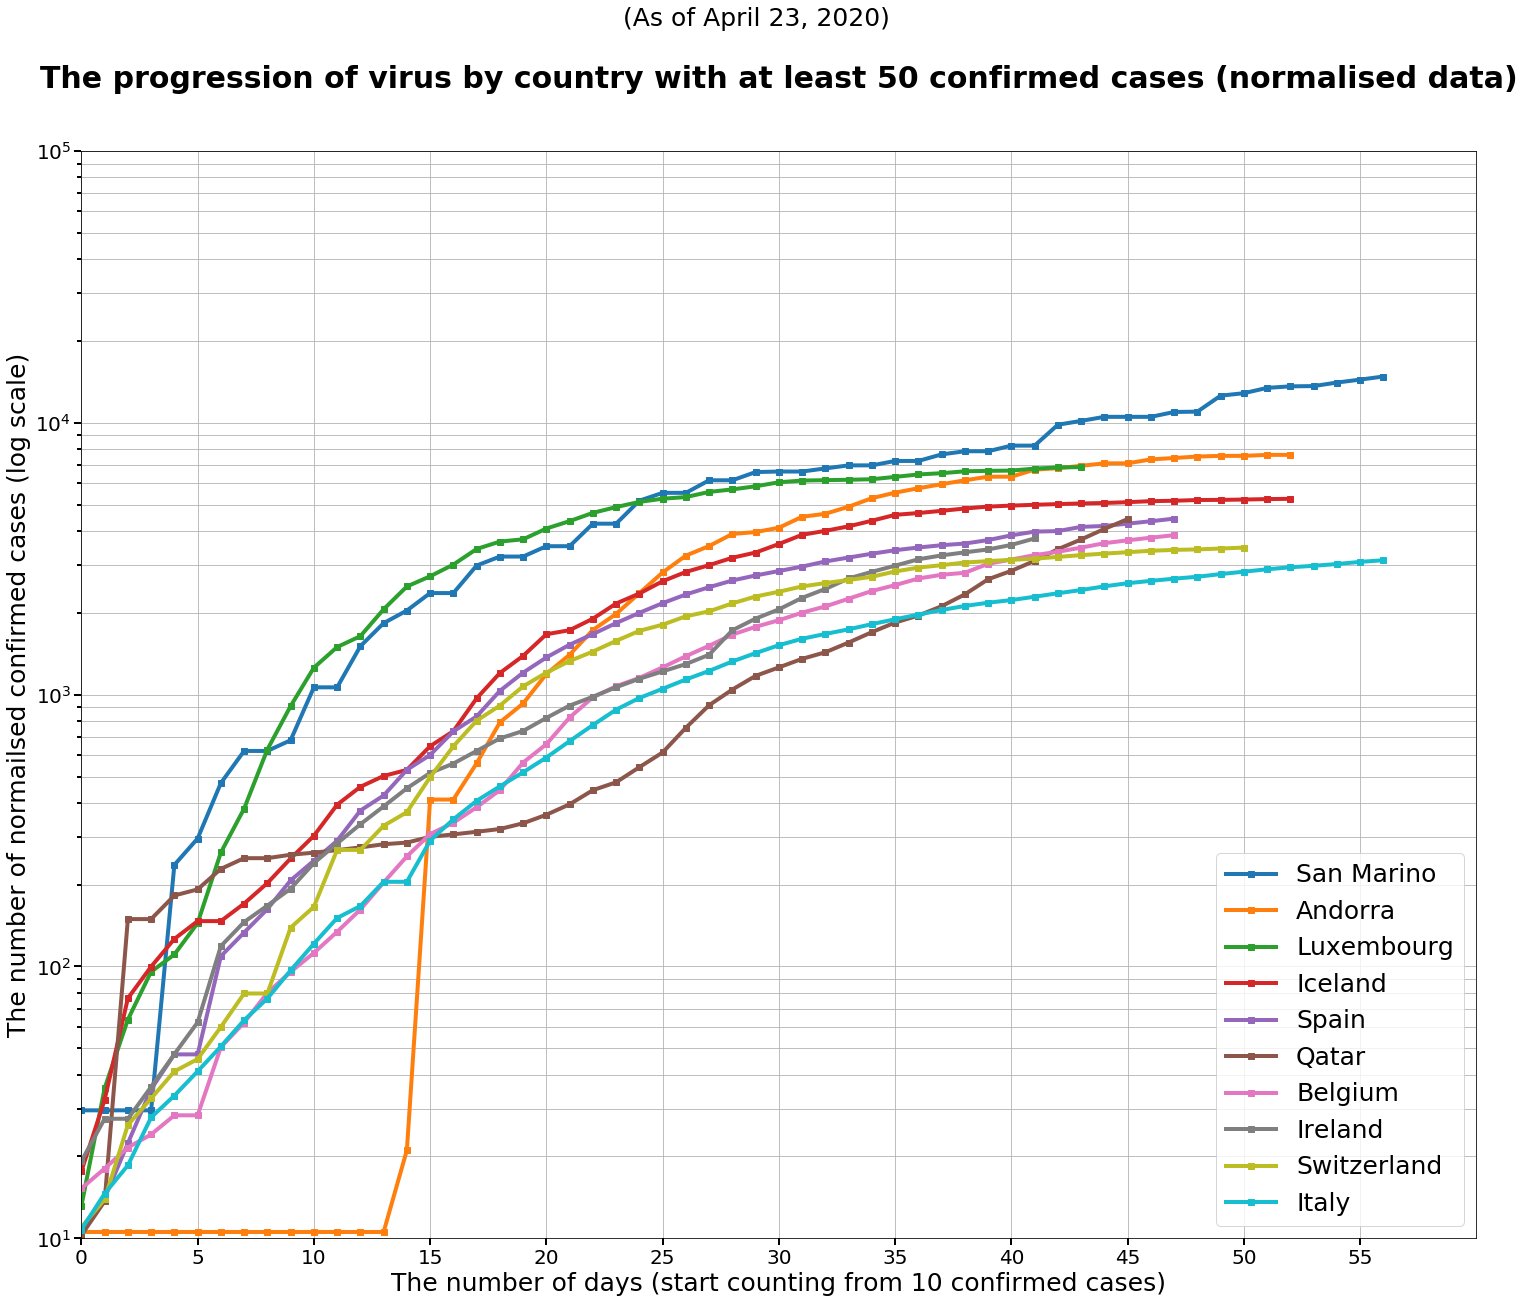

In [128]:
# create a graph from the normalised number of cases
import matplotlib.pyplot as plt 
plt.figure(figsize=(25, 20))
plt.grid(which='both')
plt.yscale('log')
plt.title("The progression of virus by country with at least 50 confirmed cases (normalised data)\n", fontsize=30, fontweight='bold', pad = 30)
plt.suptitle('(As of April 23, 2020)', fontsize=25)
plt.xlabel("The number of days (start counting from 10 confirmed cases)",fontsize=25)
plt.xticks(np.arange(0,60,5), fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("The number of normailsed confirmed cases (log scale)",fontsize=25)
plt.ylim(10,10**5)
plt.xlim(0,60)
plt.tick_params(which='both', width=2)
plt.tick_params(which='major', length=7)
plt.tick_params(which='minor', length=4)

for country in df_task5_country_norm_list:
    chart_data = df_task5.loc[df_task5['Country/Region'] == country].reset_index()
    x = chart_data['Number_Day']
    y = chart_data['Confirmed_Norm']
    plt.plot(x,y, label='%s'%country, linewidth=4, marker = 's')
    plt.legend(loc='lower right', fontsize= 25)
    
plt.show()

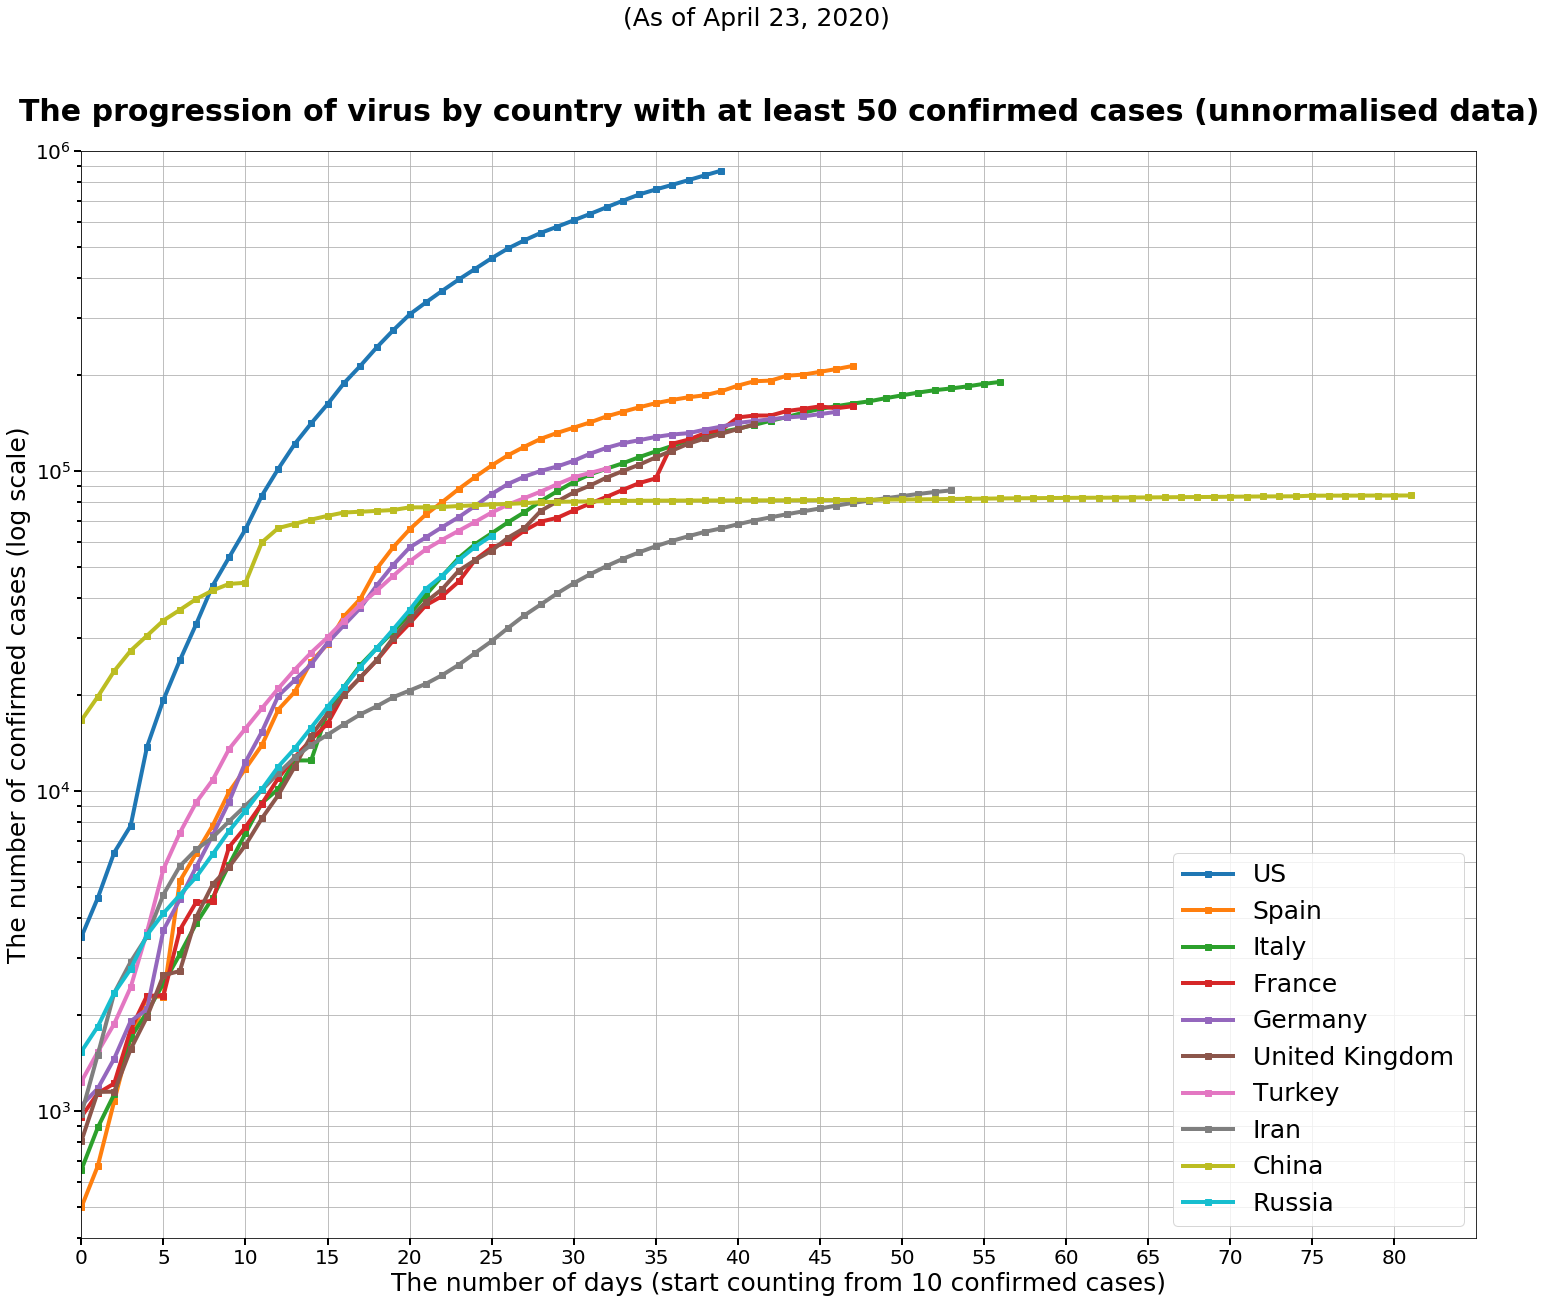

In [129]:
# create a graph from the unnormalised number of cases
plt.figure(figsize=(25, 20))
plt.grid(which='both')
plt.yscale('log')
plt.title("The progression of virus by country with at least 50 confirmed cases (unnormalised data)", fontsize=30, fontweight='bold',pad =30)
plt.suptitle('(As of April 23, 2020)', fontsize=25)
plt.xlabel("The number of days (start counting from 10 confirmed cases)",fontsize=25)
plt.xticks(np.arange(0,85,5), fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("The number of confirmed cases (log scale)",fontsize=25)
plt.ylim(400,10**6)
plt.xlim(0,85)
plt.tick_params(which='both', width=2)
plt.tick_params(which='major', length=7)
plt.tick_params(which='minor', length=4)

for country in df_task5_country_list:
    chart_data = df_task5.loc[df_task5['Country/Region'] == country].reset_index()
    x = chart_data['Number_Day']
    y = chart_data['Confirmed_Case']
    plt.plot(x,y, label='%s'%country, linewidth=4, marker = 's')
    plt.legend(loc='lower right', fontsize= 25)
    
plt.show()

#### References:
IBAN.com. (n.d.). <em>Country Codes Alpha-2 & Alpha-3.</em> Retrieved May 3, 2020, from https://www.iban.com/country-codes

Pardoe, I. (2012). <em>Applied regression modeling</em> (2nd ed.). https://doi.org/10.1002/9781118345054

Perrin, D. (2020). <em>IFN509 Data Exploration and Mining: Data cleaning, normalisation</em> [PowerPoint slides]. Blackboard. https://blackboard.qut.edu.au/bbcswebdav/pid-8513605-dt-content-rid-30705103_1/xid-30705103_1

Wikipedia contributors. (n.d.). <em>Compartmental models in epidemiology.</em> Retrieved May 3, 2020 from  https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model

Worldometer. (n.d.). <em>Countries in the world by population (2020).</em> Retrieved May 3, 2020, from https://www.worldometers.info/world-population/population-by-country/